In [17]:
import utils_io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_train_data = "data_set/train.csv"

train_data = utils_io.load_csv_data(path_train_data)
# Debugging: Check the type of train_data

# Print the loaded data
if isinstance(train_data, pd.DataFrame):
    print(f"dimension train data: {train_data.shape}")
else:
    print("train_data is not a DataFrame")

Successfully loaded data from data_set/train.csv
dimension train data: (1460, 81)


In [ ]:
printdata = train_data.iloc[:10]
print(train_data.shape)
print(printdata)

In [3]:
# Get target data
target_data = train_data["SalePrice"]
print(target_data.shape)


# Drop the Id and sales price column
train_data = train_data.drop(columns=["Id"])
train_data = train_data.drop(columns=["SalePrice"])
print(train_data.shape)

(1460,)
(1460, 79)


# Normalization


Prepare data description auto generate json file


In [4]:
import pandas as pd
import numpy as np


def auto_clean_columns(df: pd.DataFrame) -> pd.DataFrame:
    df_cleaned = df.copy()

    for column in df_cleaned.columns:
        values = df_cleaned[column].dropna().unique()

        # Pokud vše je číslo nebo 'NA' → převedeme na float
        can_be_numeric = True
        for v in values:
            if isinstance(v, str) and v.strip().upper() == "NA":
                continue
            try:
                float(v)
            except:
                can_be_numeric = False
                break

        if can_be_numeric:
            # Převést "NA" na np.nan a sloupec na float
            df_cleaned[column] = df_cleaned[column].replace("NA", np.nan)
            df_cleaned[column] = pd.to_numeric(df_cleaned[column], errors="coerce")
        else:
            # ponecháme jako kategorii se stringy
            df_cleaned[column] = df_cleaned[column].astype(str).str.strip().str.upper()

    return df_cleaned


train_data = auto_clean_columns(train_data)
print(train_data)

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   PAVE    NA      REG   
1             20       RL         80.0     9600   PAVE    NA      REG   
2             60       RL         68.0    11250   PAVE    NA      IR1   
3             70       RL         60.0     9550   PAVE    NA      IR1   
4             60       RL         84.0    14260   PAVE    NA      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   PAVE    NA      REG   
1456          20       RL         85.0    13175   PAVE    NA      REG   
1457          70       RL         66.0     9042   PAVE    NA      REG   
1458          20       RL         68.0     9717   PAVE    NA      REG   
1459          20       RL         75.0     9937   PAVE    NA      REG   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0            LVL    ALLPUB    INSIDE  ...  

In [5]:
result = {}

# column = "MSSubClass"
column = "LotFrontage"

result[column] = {"description": "", "items": {}}

id_counter = 0
seen = {}

for value in train_data[column]:
    if isinstance(value, str):
        # Add NA for first every column
        if "NA" not in seen:
            result[column]["items"]["NA"] = {"id": id_counter}
            seen["NA"] = True
            id_counter += 1

        key = value.strip().upper()
        if key not in seen:
            result[column]["items"][key] = {"id": id_counter}
            seen[key] = True
            id_counter += 1
    # else:
    # print(column)
print(result)

{'LotFrontage': {'description': '', 'items': {}}}


In [6]:
import pandas as pd
import json


def auto_generate_description_dict(train_data: pd.DataFrame) -> dict:
    result = {}

    for column in train_data.columns:
        result[column] = {"description": "", "items": {}}

        id_counter = 0
        seen = {}

        for value in train_data[column]:
            if isinstance(value, str):
                # Add NA for first every column
                if "NA" not in seen:
                    result[column]["items"]["NA"] = {"id": id_counter}
                    seen["NA"] = True
                    id_counter += 1

                key = value.strip().upper()
                if key not in seen:
                    result[column]["items"][key] = {"id": id_counter}
                    seen[key] = True
                    id_counter += 1
            # else:
            # print(column)

    return result


#  Create descriptions from train data (DO NOT DO IT FROM TEST DATA)
description_dictionary = auto_generate_description_dict(train_data)
print(description_dictionary)

with open("data_set/generated_description.json", "w", encoding="utf-8") as f:
    json.dump(description_dictionary, f, indent=2, ensure_ascii=False)

print("✅ JSON dictionary generated.")

{'MSSubClass': {'description': '', 'items': {}}, 'MSZoning': {'description': '', 'items': {'NA': {'id': 0}, 'RL': {'id': 1}, 'RM': {'id': 2}, 'C (ALL)': {'id': 3}, 'FV': {'id': 4}, 'RH': {'id': 5}}}, 'LotFrontage': {'description': '', 'items': {}}, 'LotArea': {'description': '', 'items': {}}, 'Street': {'description': '', 'items': {'NA': {'id': 0}, 'PAVE': {'id': 1}, 'GRVL': {'id': 2}}}, 'Alley': {'description': '', 'items': {'NA': {'id': 0}, 'GRVL': {'id': 1}, 'PAVE': {'id': 2}}}, 'LotShape': {'description': '', 'items': {'NA': {'id': 0}, 'REG': {'id': 1}, 'IR1': {'id': 2}, 'IR2': {'id': 3}, 'IR3': {'id': 4}}}, 'LandContour': {'description': '', 'items': {'NA': {'id': 0}, 'LVL': {'id': 1}, 'BNK': {'id': 2}, 'LOW': {'id': 3}, 'HLS': {'id': 4}}}, 'Utilities': {'description': '', 'items': {'NA': {'id': 0}, 'ALLPUB': {'id': 1}, 'NOSEWA': {'id': 2}}}, 'LotConfig': {'description': '', 'items': {'NA': {'id': 0}, 'INSIDE': {'id': 1}, 'FR2': {'id': 2}, 'CORNER': {'id': 3}, 'CULDSAC': {'id': 4}

In [ ]:
print(train_data.iloc[:10])

In [49]:
import json
import re

txt_path = "data_set/data_description.txt"
json_path = "data_set/generated_description.json"


# Použití
# utils_io.parse_description_txt_to_json(txt_path, json_path)

generated_description = json.load(open(json_path))


for column in train_data.columns:
    for index, value in train_data[column].items():
        # if value == "C (all)":
        #     print(column, index, value)
        if isinstance(value, str):
            try:
                train_data.at[index, column] = generated_description[column]["items"][
                    value.strip().upper()
                ]["id"]
            except:
                print(column, index, value, isinstance(value, str))

SyntaxError: invalid syntax (1693285669.py, line 24)

In [8]:
print(train_data.iloc[:10])

   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60        1         65.0     8450      1     0        1   
1          20        1         80.0     9600      1     0        1   
2          60        1         68.0    11250      1     0        2   
3          70        1         60.0     9550      1     0        2   
4          60        1         84.0    14260      1     0        2   
5          50        1         85.0    14115      1     0        2   
6          20        1         75.0    10084      1     0        1   
7          60        1          NaN    10382      1     0        2   
8          50        2         51.0     6120      1     0        1   
9         190        1         50.0     7420      1     0        1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
0           1         1         1  ...           0        0      0     0   
1           1         1         2  ...           0        0      0     0   
2

calc mean and std


In [ ]:
mean = train_data.mean(axis=0)
# print(mean)
std = train_data.std(axis=0)
# print(std)

train_data = train_data - mean
train_data = train_data / std

In [ ]:
print(train_data.iloc[:10])

# Create NN neural network


In [25]:
print(max(target_data))
print(min(target_data))
print(np.mean(target_data))
print(max(target_data) - min(target_data))

755000.0
34900.0
180921.19
720100.0


In [10]:
print(train_data.shape)

(1460, 79)


In [11]:
train_data = train_data.astype("float32")
target_data = target_data.astype("float32")

In [12]:
i = 0

k = 4
num_val_samples = len(train_data) // k
print(num_val_samples)
print(f"processing fold # {i}")
print(target_data.shape)
val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
val_targets = target_data[i * num_val_samples : (i + 1) * num_val_samples]
print(val_data.shape)
print(val_targets.shape)

partial_train_data = pd.concat(
    [train_data[: i * num_val_samples], train_data[(i + 1) * num_val_samples :]]
)
partial_train_targets = pd.concat(
    [target_data[: i * num_val_samples], target_data[(i + 1) * num_val_samples :]]
)
print(partial_train_data.shape)
print(partial_train_targets.shape)
# print(partial_train_data.shape)
print(train_data.shape[1])

365
processing fold # 0
(1460,)
(365, 79)
(365,)
(1095, 79)
(1095,)
79


In [30]:
baseline_prediction = np.full_like(target_data, np.mean(target_data))
baseline_mae = np.mean(np.abs(target_data - baseline_prediction))
print(baseline_mae)

57434.773


In [45]:
import keras
import time

start = time.time()


def build_model():
    input_shape = (79,)  # 79 parameters of house
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(128, activation="relu", input_shape=input_shape))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(64, activation="relu"))
    model.add(keras.layers.Dense(1))  # regresní výstup
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model


# def build_model():
#     model = keras.models.Sequential()
#     input_shape = (79,)  # 79 parameters of house
#     model.add(
#         keras.layers.Dense(units=256, activation="relu"),
#     )
#     model.add(keras.layers.Dense(units=256, activation="relu"))
#     model.add(keras.layers.Dense(units=256, activation="relu"))
#     model.add(keras.layers.Dense(units=1))  # output layer price of house
#     model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
#     return model


k = 5
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
all_histories = []

for i in range(k):
    print(f"processing fold # {i}")
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = target_data[i * num_val_samples : (i + 1) * num_val_samples]
    partial_train_data = pd.concat(
        [train_data[: i * num_val_samples], train_data[(i + 1) * num_val_samples :]]
    )
    partial_train_targets = pd.concat(
        [target_data[: i * num_val_samples], target_data[(i + 1) * num_val_samples :]]
    )

    model = build_model()
    print("- 🧠 Spouštím trénování...")
    history = model.fit(
        partial_train_data,
        partial_train_targets,
        epochs=num_epochs,
        batch_size=64,
        verbose=0,
    )

    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    print(f"- ✅ Fold {i + 1} finished: val_mae = {val_mae:.2f}")
    all_scores.append(val_mae)
    all_histories.append(history)

print(all_scores)
print(f"🕒 Celkový čas trénování: {time.time() - start:.2f} s")

processing fold # 0
- 🧠 Spouštím trénování...


C:\Users\Uzivatel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- ✅ Fold 1 finished: val_mae = 65509.67
processing fold # 1
- 🧠 Spouštím trénování...


C:\Users\Uzivatel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- ✅ Fold 2 finished: val_mae = 70209.56
processing fold # 2
- 🧠 Spouštím trénování...


C:\Users\Uzivatel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- ✅ Fold 3 finished: val_mae = 61769.52
processing fold # 3
- 🧠 Spouštím trénování...


C:\Users\Uzivatel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- ✅ Fold 4 finished: val_mae = 59325.83
processing fold # 4
- 🧠 Spouštím trénování...


C:\Users\Uzivatel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- ✅ Fold 5 finished: val_mae = 57873.86
[65509.671875, 70209.5625, 61769.51953125, 59325.828125, 57873.86328125]
🕒 Celkový čas trénování: 36.36 s


In [46]:
model.save("house_prices_0.keras")

In [47]:
print("\n" + "=" * 50)
print("📊 Výsledky cross-validace:")
for i, score in enumerate(all_scores):
    print(f"Fold {i + 1}: MAE = {score:.2f}")

average = np.mean(all_scores)
print("-" * 50)
print(f"📈 Průměrná MAE přes {k} foldů: {average:.2f}")


📊 Výsledky cross-validace:
Fold 1: MAE = 65509.67
Fold 2: MAE = 70209.56
Fold 3: MAE = 61769.52
Fold 4: MAE = 59325.83
Fold 5: MAE = 57873.86
--------------------------------------------------
📈 Průměrná MAE přes 5 foldů: 62937.69


C:\Users\Uzivatel\AppData\Local\Temp\ipykernel_40664\840741304.py:24: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Uzivatel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


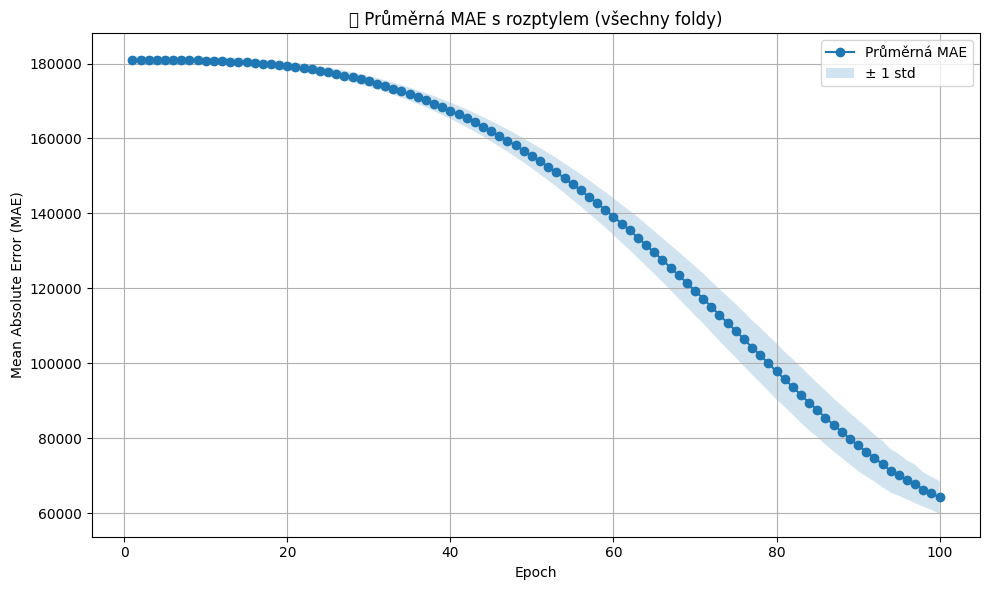

In [48]:
epoch_maes = [
    [history.history["mae"][epoch] for history in all_histories]
    for epoch in range(num_epochs)
]
average_mae_history = [np.mean(epoch) for epoch in epoch_maes]
std_mae_history = [np.std(epoch) for epoch in epoch_maes]

plt.figure(figsize=(10, 6))
plt.plot(
    range(1, num_epochs + 1), average_mae_history, marker="o", label="Průměrná MAE"
)
plt.fill_between(
    range(1, num_epochs + 1),
    np.array(average_mae_history) - np.array(std_mae_history),
    np.array(average_mae_history) + np.array(std_mae_history),
    alpha=0.2,
    label="± 1 std",
)
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("📈 Průměrná MAE s rozptylem (všechny foldy)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Test model on test data
